In [6]:
using DynamicalSystems, DifferentialEquations, OrdinaryDiffEq, StaticArrays, CairoMakie

### Green space

U0 = 0.23

I0 = -1.45

u0 = SA[1.46577,  0.7359,    0.65397,   0.053783];

### Red space

U0 = 0.25

I0 = -1.45

u0 = SA[1.46577,  0.7359,    0.65397,   0.053783];

### Пачки из трёх спайков

U0 = 0.25

I0 = -1.573
u0 = 1.3403239669724387, 0.7788950798545725, 0.6941625778210773, 0.03677942307955071

### Пачки из четырех спайков

I0 = -1.5682

### измёнен аттрактор

I0 = -1.54980

### слишком большая пачка

I0 = -1.54500

### бифуркация?

I0 = -1.54490

I0 = -1.54488275

I0 = -1.54488271

u0 = SA[1.3403239669724387, 0.7788950798545725, 0.6941625778210773, 0.03677942307955071]

In [7]:
τ = 0.013
α = 1.5
J = 3.07
τ_D = 0.15
U0 = 0.33
τ_F = 1
ΔU0 = 0.305
τ_y = 1.8
β = 0.4375
xthr = 0.9
ythr = 0.5

0.5

In [8]:
U(y) = U0 + ΔU0 / ( 1 + exp( -50 * ( y - ythr ) ) )
σ(x)= 1 / (1 + exp(-20 * (x - xthr)))

σ (generic function with 1 method)

In [9]:
function model(u, p ,t)
    
    E, x, u_, y = u
    τ, α, τ_D, J, U0, ΔU0, τ_y, β, xthr, ythr, I0 = p
    
    du1 = (-E + α * log( 1 + exp( ( J * u_ * x * E + I0 ) / α ) )) / τ
    du2 = ( 1 - x ) / τ_D - u_ * x * E
    du3 = (U(y) - u_) / τ_F + U(y) * ( 1 - u_ ) * E
    du4 = -y /  τ_y + β * σ(x)
    
    return SVector(du1, du2, du3, du4)
    
end

model (generic function with 1 method)

In [10]:
I0 = -1.6

p = SA[τ, α, τ_D, J, U0, ΔU0, τ_y, β, xthr, ythr, I0]
u0 = SA[3.3403239669724387, 0.1, 0.1, 0.03677942307955071]
tspan = (0.0, 1000.0)

ds = ContinuousDynamicalSystem(model, u0, p)

println(ds.p)
tr = trajectory(ds, tspan[2], Ttr = tspan[2]/2; Δt = 0.001, diffeq = (alg = RK4(),  adaptive = false, dt = 0.01))

[0.013, 1.5, 0.15, 3.07, 0.33, 0.305, 1.8, 0.4375, 0.9, 0.5, -1.6]


4-dimensional Dataset{Float64} with 1000001 points
 19.1243   0.331447  0.840214  0.0060617
 18.7887   0.330633  0.840702  0.00605833
 18.4548   0.329925  0.841168  0.00605497
 18.1229   0.329322  0.841614  0.00605162
 17.7934   0.328819  0.84204   0.00604826
 17.4666   0.328415  0.842445  0.00604491
 17.1427   0.328107  0.842831  0.00604155
 16.8221   0.327891  0.843198  0.0060382
 16.505    0.327765  0.843546  0.00603485
 16.1917   0.327726  0.843876  0.00603151
 15.8826   0.327772  0.844187  0.00602816
 15.5779   0.327899  0.844481  0.00602482
 15.2776   0.328104  0.844757  0.00602148
  ⋮                            
  1.98523  0.708358  0.783692  0.00567384
  2.00064  0.709192  0.783381  0.00568003
  2.01658  0.710012  0.783071  0.00568638
  2.03306  0.710816  0.782763  0.00569287
  2.05012  0.711605  0.782457  0.00569951
  2.06777  0.712379  0.782153  0.00570629
  2.08605  0.713136  0.78185   0.00571322
  2.10498  0.713877  0.781549  0.0057203
  2.12459  0.714602  0.781251  0.00572

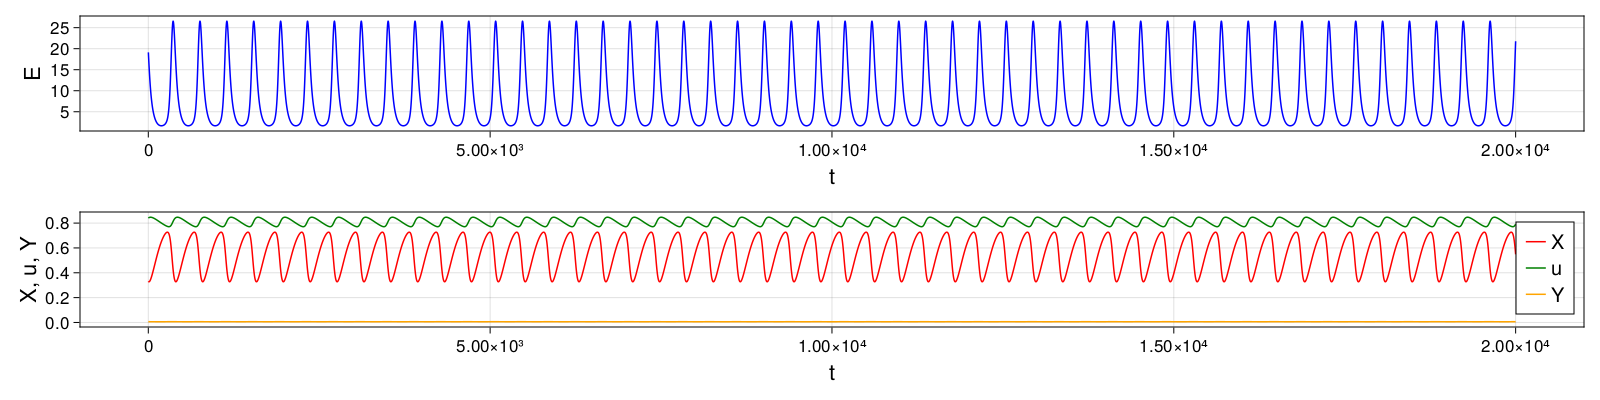

In [11]:
f = Figure(resolution = (1600, 400))

ax1 = Axis(f[1, 1], xlabel = "t", ylabel = "E", xlabelsize = 22, ylabelsize = 22,xticklabelsize = 17, yticklabelsize = 17)
ax2 = Axis(f[2, 1], xlabel = "t", ylabel = "X, u, Y", xlabelsize = 22, ylabelsize = 22,xticklabelsize = 17, yticklabelsize = 17)

ts, tf = 1, 20000

lines!(ax1, tr[ts:tf, 1], color = "blue", label = "E")

lines!(ax2, tr[ts:tf, 2], color = "red", label = "X")
lines!(ax2, tr[ts:tf, 3], color = "green", label = "u")
lines!(ax2, tr[ts:tf, 4], color = "orange", label = "Y")

axislegend(ax2, labelsize=20)
f

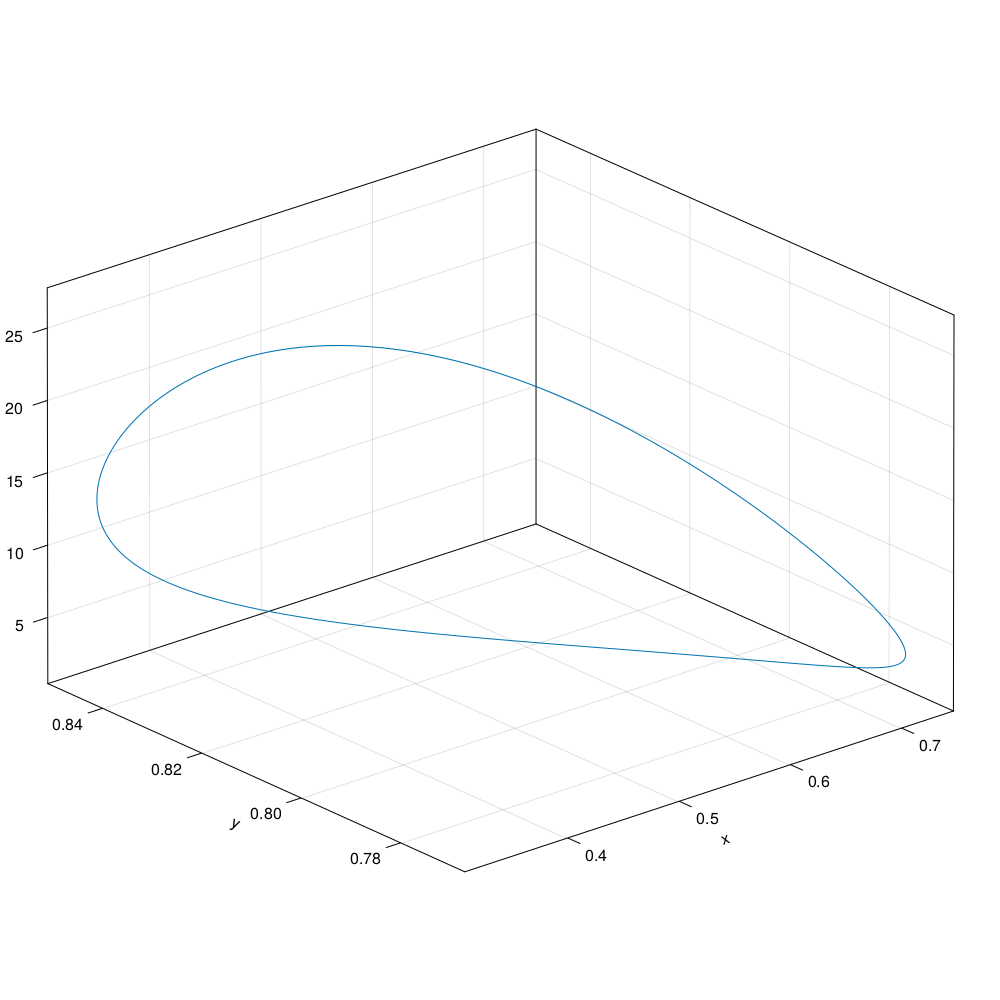

In [12]:
f = Figure(resolution = (1000, 1000))
ts, tf = 1, 20000
ax = Axis3(f[1, 1])
lines!(tr[ts:tf, 2], tr[ts:tf, 3], tr[ts:tf, 1], linewidth = 1)
f

In [13]:
λλ = lyapunovspectrum(ds, tspan[2], Δt = 0.1, Ttr = tspan[2]/2; diffeq = (alg = RK4(),  adaptive = false, dt = 0.001) )

4-element Vector{Float64}:
  0.0050301205583148075
 -0.5555555556197728
 -1.499631615862254
 -3.2507781355476086

In [17]:
U0_start =  0.35
U0_finish = 0.33
U0_step = -0.0002

I0_start =  -1.8
I0_finish = -1.6
I0_step = 0.002

range_U0 = range(U0_start, U0_finish, step = U0_step)
range_I0 = range(I0_start, I0_finish, step = I0_step)

-1.8:0.002:-1.6

In [18]:
length(range_I0)

101

In [19]:
length(range_U0)

101

In [20]:
u0 = SA[3.3403239669724387, 0.1, 0.1, 0.03677942307955071];
tspan = (0.0, 2500.0)
ϵ = [0.0001, 0.0001, 0.0001, 0.0001]

4-element Vector{Float64}:
 0.0001
 0.0001
 0.0001
 0.0001

In [21]:
array_initial_condition = zeros(length(range_U0), 4 )
array_SLE = zeros(length(range_U0), 4 );

In [23]:
for index in range(1, length(range_U0), step = 1)
    
   
    if index == 1
        global u0_lc = SA[3.3403239669724387, 0.1, 0.1, 0.03677942307955071]
    end
    
    I0_lc = range_I0[index]
    U0lc = range_U0[index]
    println("index: $index; I0: $I0_lc; U0: $U0lc");flush(stdout)
    println(" u0: $u0_lc ");flush(stdout)
    
    array_initial_condition[index, :] = u0_lc
    
    p_lc = SA[τ, α, τ_D, J, U0lc, ΔU0, τ_y, β, xthr, ythr, I0_lc]
    ds_lc = ContinuousDynamicalSystem(model, u0_lc, p_lc)
    
    tr = trajectory(ds_lc, tspan[2], Ttr = tspan[2]/2; Δt = 0.001, diffeq = (alg = RK4(),  adaptive = false, dt = 0.01))
    
    λλ = lyapunovspectrum(ds_lc, tspan[2], Δt = 1, Ttr = tspan[2]/2; diffeq = (alg = RK4(),  adaptive = false, dt = 0.01) )
    println("LSE: $λλ");flush(stdout)
    array_SLE[index, :] = λλ
    
    u0_lc = tr[end, :]
    random_point = tr[200000, :]
    println("  ");flush(stdout)
    println("u0_lc: $u0_lc")
    println("random point: $random_point")
    if abs.(u0_lc - random_point) < ϵ
        u0_lc = SA[3.3403239669724387, 0.1, 0.1, 0.03677942307955071]
        println("DETECT FP, CHANGING u0 on $u0_lc");flush(stdout)
    end
    println(" ------------- ");flush(stdout)
    println(" ------------- ");flush(stdout)
   
    
    
end

index: 1; I0: -1.8; U0: 0.35
 u0: [3.3403239669724387, 0.1, 0.1, 0.03677942307955071] 
LSE: [-1.3906128362877977e-5, -0.5555555598920062, -1.5380989837691326, -9.069202751647802]
  
u0_lc: [1.2452929683060623, 0.8214467295837207, 0.7312579361680683, 0.05604148089429433]
random point: [9.835541878563438, 0.34932718214852215, 0.8269034805003298, 0.060139962522869635]
 ------------- 
 ------------- 
index: 2; I0: -1.798; U0: 0.3498
 u0: [1.2452929683060623, 0.8214467295837207, 0.7312579361680683, 0.05604148089429433] 
LSE: [0.002116525074069268, -0.5555555407082585, -1.5721121648458085, -9.04211007558179]
  
u0_lc: [27.080971125173537, 0.38044223327442966, 0.7959792650886238, 0.060520291782434066]
random point: [0.8658138163893091, 0.6897597676657616, 0.7785547826673848, 0.054035262573488986]
 ------------- 
 ------------- 
index: 3; I0: -1.796; U0: 0.3496
 u0: [27.080971125173537, 0.38044223327442966, 0.7959792650886238, 0.060520291782434066] 
LSE: [0.0017985983515053732, -0.555555548643

LSE: [0.00011781984672560149, -0.5555555432178441, -2.0091551109883734, -8.355576203903839]
  
u0_lc: [25.872769421110014, 0.5528456992348577, 0.7606365180242322, 0.04279928437224041]
random point: [0.9329241930027798, 0.6688689286461192, 0.7875860181238824, 0.03783229253549535]
 ------------- 
 ------------- 
index: 21; I0: -1.76; U0: 0.346
 u0: [25.872769421110014, 0.5528456992348577, 0.7606365180242322, 0.04279928437224041] 
LSE: [0.0010794765572481608, -0.5555555526356746, -2.027797101245833, -8.309237986734868]
  
u0_lc: [1.2094542912270048, 0.7913077133693522, 0.7496981077290285, 0.03714351824770801]
random point: [2.476571358059315, 0.4807638244352125, 0.8213442080279741, 0.03884384168708904]
 ------------- 
 ------------- 
index: 22; I0: -1.758; U0: 0.3458
 u0: [1.2094542912270048, 0.7913077133693522, 0.7496981077290285, 0.03714351824770801] 
LSE: [0.0010270734911338511, -0.5555555546129981, -2.0453926038680286, -8.263649790084829]
  
u0_lc: [1.0562416601378033, 0.7606257418166

  
u0_lc: [2.224023398250609, 0.49744154709586474, 0.8222339456998764, 0.02782600872348292]
random point: [16.04485155124512, 0.3214641907561881, 0.8339878367987481, 0.029270661091000776]
 ------------- 
 ------------- 
index: 40; I0: -1.722; U0: 0.3422
 u0: [2.224023398250609, 0.49744154709586474, 0.8222339456998764, 0.02782600872348292] 
LSE: [-0.00012937957013465473, -0.5555555558941764, -2.312739592891401, -7.328165002781457]
  
u0_lc: [3.1210935160330617, 0.4565918086947467, 0.8281160378896766, 0.027576537799270488]
random point: [1.0415403828658887, 0.7159007543731271, 0.7785658563459927, 0.025993000729744878]
 ------------- 
 ------------- 
index: 41; I0: -1.72; U0: 0.342
 u0: [3.1210935160330617, 0.4565918086947467, 0.8281160378896766, 0.027576537799270488] 
LSE: [0.0016892184799925326, -0.5555555499303954, -2.3258357886410566, -7.271924234634017]
  
u0_lc: [1.2223779437255873, 0.593334463239432, 0.8065115711088066, 0.026235427654365553]
random point: [4.44540597252333, 0.41665

  
u0_lc: [1.6468052949670389, 0.5494955346774313, 0.8165991135247048, 0.01928545182900184]
random point: [1.159106721299107, 0.635857900434719, 0.8001200980419624, 0.01888726464654217]
 ------------- 
 ------------- 
index: 59; I0: -1.684; U0: 0.3384
 u0: [1.6468052949670389, 0.5494955346774313, 0.8165991135247048, 0.01928545182900184] 
LSE: [-0.0006991899472790844, -0.5555555568667974, -2.5230950683853264, -6.130184462310286]
  
u0_lc: [1.474411496062063, 0.7671130205434191, 0.7621299639126168, 0.018761104491242672]
random point: [1.1857038015996564, 0.6280026525234532, 0.8018930109544719, 0.01855739096397599]
 ------------- 
 ------------- 
index: 60; I0: -1.682; U0: 0.3382
 u0: [1.474411496062063, 0.7671130205434191, 0.7621299639126168, 0.018761104491242672] 
LSE: [0.00017721513850695083, -0.5555555556676242, -2.532802608422162, -6.061108538008202]
  
u0_lc: [1.6369302240271453, 0.5519967706799348, 0.8164167205086174, 0.01853383479703687]
random point: [2.46401665875989, 0.78544372

  
u0_lc: [22.85015216785563, 0.5694358369884623, 0.7776301039478791, 0.0142247241850159]
random point: [1.50040483691708, 0.5878491615640641, 0.8118310756297339, 0.012769232573659757]
 ------------- 
 ------------- 
index: 78; I0: -1.646; U0: 0.3346
 u0: [22.85015216785563, 0.5694358369884623, 0.7776301039478791, 0.0142247241850159] 
LSE: [0.0014531846308973556, -0.555555555423726, -2.66364993672152, -4.665244190027651]
  
u0_lc: [22.86968510650815, 0.3362282821801526, 0.830744391105558, 0.013561728562989697]
random point: [2.2568081712847308, 0.5134135651010318, 0.824946863206588, 0.012690869967202718]
 ------------- 
 ------------- 
index: 79; I0: -1.644; U0: 0.3344
 u0: [22.86968510650815, 0.3362282821801526, 0.830744391105558, 0.013561728562989697] 
LSE: [-0.0006429932707843848, -0.5555555556263928, -2.666828856171455, -4.578565750051429]
  
u0_lc: [11.552913124393116, 0.3330676020089225, 0.8439410488215405, 0.01298947395147648]
random point: [16.329432578116684, 0.321625480494238

  
u0_lc: [1.8863637640940005, 0.7225902310926635, 0.7790216502114806, 0.00730113780382361]
random point: [1.737413513141936, 0.7122230067305939, 0.7828372423630559, 0.007216725075831996]
 ------------- 
 ------------- 
index: 97; I0: -1.608; U0: 0.3308
 u0: [1.8863637640940005, 0.7225902310926635, 0.7790216502114806, 0.00730113780382361] 
LSE: [-0.0005039168382462485, -0.5555555556029659, -2.0780514970875625, -3.295364084032499]
  
u0_lc: [12.722460697278004, 0.33155812949117014, 0.8459501961637554, 0.007381954165045181]
random point: [1.5861595399637574, 0.6292509781569606, 0.8052458283896324, 0.006832351768695732]
 ------------- 
 ------------- 
index: 98; I0: -1.606; U0: 0.3306
 u0: [12.722460697278004, 0.33155812949117014, 0.8459501961637554, 0.007381954165045181] 
LSE: [-0.0013095804570878134, -0.5555555556103783, -1.9552754022706236, -3.276124609264112]
  
u0_lc: [5.048556809128262, 0.4142182868958175, 0.8413938740383451, 0.006863616493971571]
random point: [1.856188835036143, 0

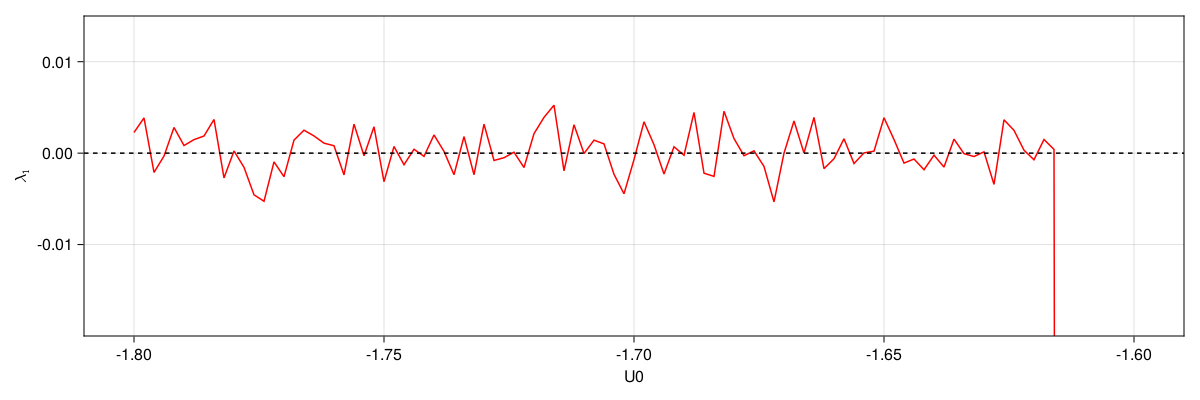

In [111]:
f = Figure(resolution = (1200, 400))
ax = Axis(f[1, 1], xlabel = "U0", ylabel = L"λ_1")

lines!(ax, range_I0, array_SLE[:, 1], color = "red")


hlines!(ax, 0, range_I0, linewidth = 1.5, color = "black", linestyle = :dash)
ylims!(-0.02, 0.015)
f

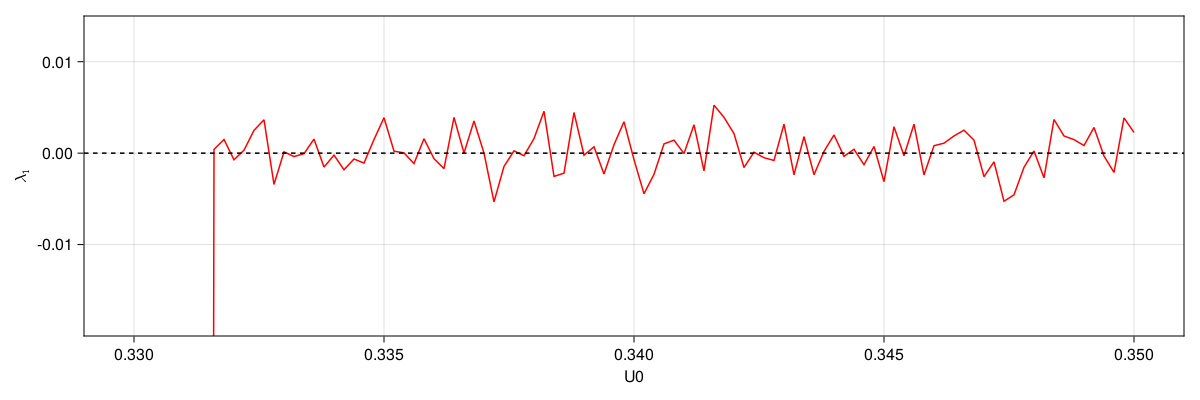

In [112]:
f = Figure(resolution = (1200, 400))
ax = Axis(f[1, 1], xlabel = "U0", ylabel = L"λ_1")

lines!(ax, range_U0, array_SLE[:, 1], color = "red")


hlines!(ax, 0, range_U0, linewidth = 1.5, color = "black", linestyle = :dash)
ylims!(-0.02, 0.015)
f

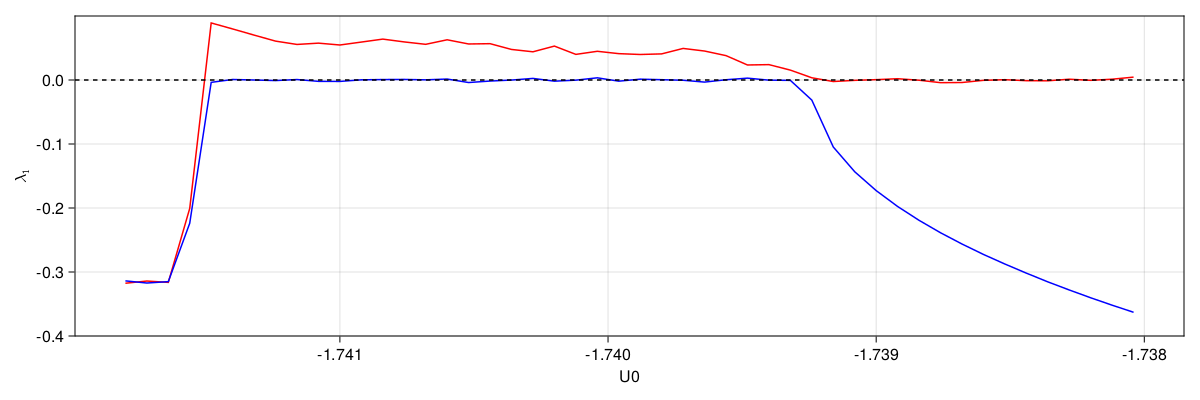

In [67]:
f = Figure(resolution = (1200, 400))
ax = Axis(f[1, 1], xlabel = "U0", ylabel = L"λ_1")

lines!(ax, range_p, array_SLE[:, 1], color = "red")
lines!(ax, range_p, array_SLE[:, 2], color = "blue")

hlines!(ax, 0, range_U0, linewidth = 1.5, color = "black", linestyle = :dash)
ylims!(-0.4, 0.1)
f

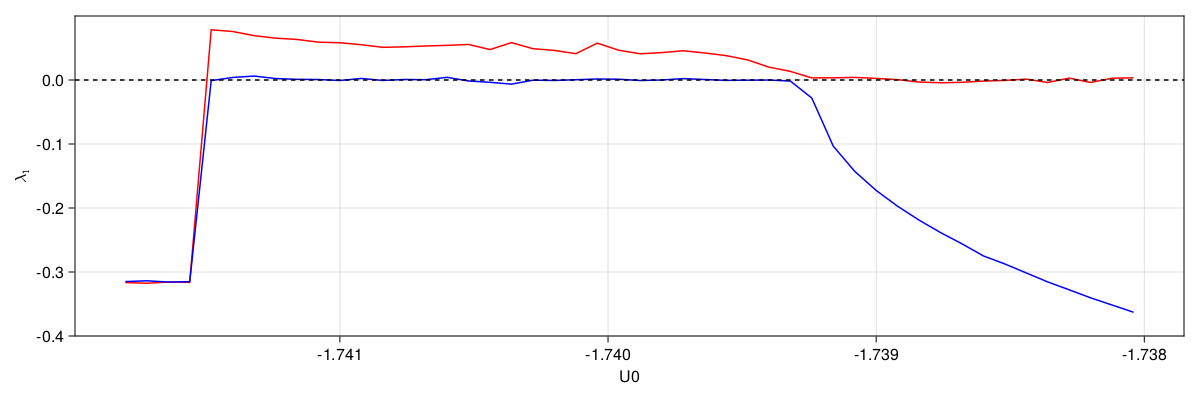

In [55]:
f = Figure(resolution = (1200, 400))
ax = Axis(f[1, 1], xlabel = "U0", ylabel = L"λ_1")

lines!(ax, range_p, array_SLE[:, 1], color = "red")
lines!(ax, range_p, array_SLE[:, 2], color = "blue")

hlines!(ax, 0, range_p, linewidth = 1.5, color = "black", linestyle = :dash)
ylims!(-0.4, 0.1)
f